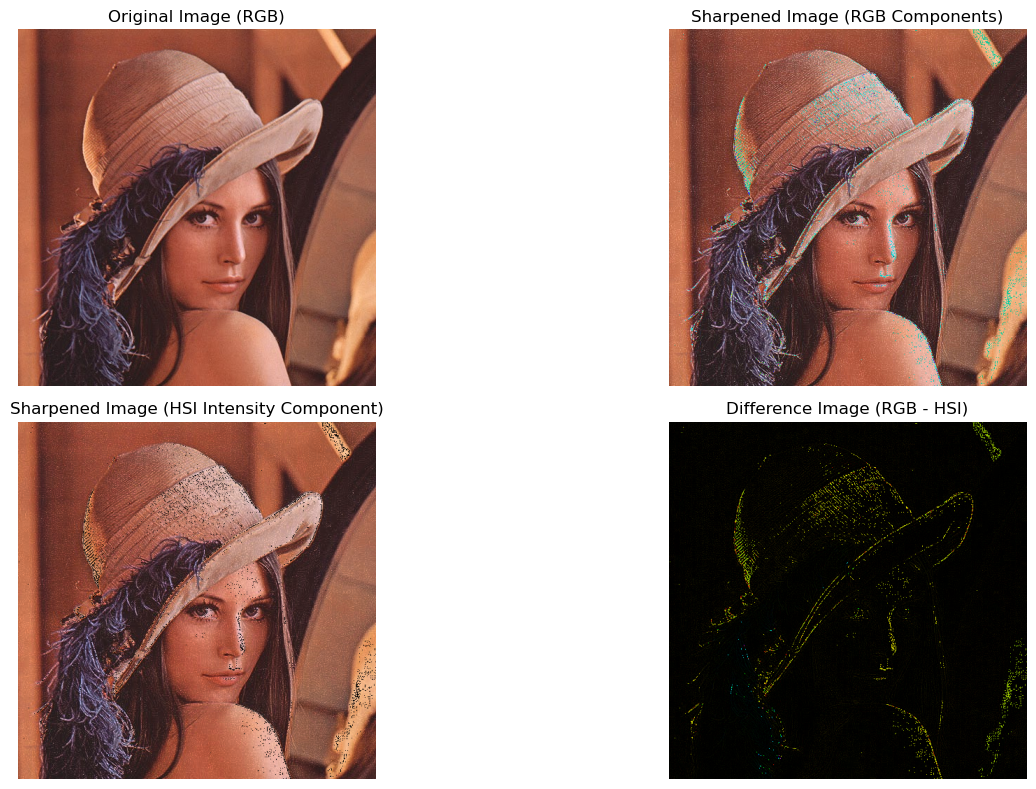

In [8]:
"""
This program demonstrates how to sharpen a grayscale image using the Laplacian operator.

### Theoretical Explanation:
1. **Grayscale Image**: The input image is first converted to grayscale. A grayscale image represents intensity (brightness) values in a single channel (with no color information). Intensity values range from black (0) to white (255), with varying shades of gray in between.

2. **Laplacian Operator**: The Laplacian is a second-order derivative filter that highlights regions of rapid intensity change, which typically correspond to edges in the image. It is defined as:
   
   ∇² I(x, y) = ∂²I/∂x² + ∂²I/∂y²
   
   Where `I(x, y)` is the intensity at a pixel (x, y), and the Laplacian operator calculates how much the intensity at a pixel differs from its neighboring pixels in both the horizontal and vertical directions.

   The Laplacian kernel used in this program is a 3x3 filter:

   [[ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]]

   This kernel computes the second derivative of the intensity and highlights regions with high-frequency information (edges).

3. **Sharpening Process**: Sharpening is performed by adding the Laplacian result to the original grayscale image. This amplifies the edges and enhances the details in areas of rapid intensity change. The formula for sharpening is:

   Sharpened Image = Original Image + Laplacian Image

   The Laplacian highlights the edges, and when added to the original grayscale image, it makes the edges more pronounced, leading to a sharper image.

4. **Result**: After sharpening, the image will show enhanced edges, making transitions between light and dark regions more defined. However, this process may also amplify noise, especially in uniform or low-contrast areas, making the image appear noisier in certain regions.

### Steps in the Code:
1. Load the input image and convert it to grayscale using `cv2.cvtColor()`.
2. Apply the Laplacian operator to the grayscale image using the `cv2.filter2D()` function.
3. Combine the Laplacian result with the original grayscale image to sharpen the image using `cv2.add()`.
4. Display the original and sharpened images side by side using Matplotlib's `imshow()` function for comparison.

The result is a sharper image with enhanced edges, suitable for applications where edge detection or fine detail enhancement is required.


___________________________________________________________________________________________________________
# Image Sharpening Using Laplacian Filter
#
# In the code above, sharpening is applied using the **Laplacian filter** on the **RGB channels** and the **Intensity channel** of the **HSI (HSV)** representation.
# While the Laplacian filter is designed to enhance edges, it can also amplify **noise** in the image, especially in areas with little texture or contrast.
# This noise can appear as random variations in pixel values, causing undesirable artifacts after the sharpening process.
#
# ## Noise Impact on Sharpening
#
# ### Sharpening and Noise Amplification
#
# Sharpening methods like **Laplacian sharpening** are known to enhance edges by emphasizing differences in pixel values.
# If there is noise (random pixel intensity variations) in the image, it will also be amplified during this process.
# This is particularly noticeable when sharpening with **high-pass filters** (like Laplacian), as they are sensitive to small changes in pixel intensity, including noise.
#
# ### Effect on RGB Sharpening
#
# Since sharpening is applied to each **RGB channel** separately, the noise in individual channels can combine in unexpected ways.
# This may lead to **color distortions**, where the noise in one channel (like blue or green) could cause **color fringing** or unnatural hues in the sharpened image.
#
# ### Effect on HSI Sharpening
#
# In the **HSI sharpening** approach, only the **Intensity (I)** channel is sharpened.
# The **Hue (H)** and **Saturation (S)** channels remain unaffected.
# The **Intensity channel** is often the most sensitive to changes in light, so noise in this channel can be exaggerated.
# Since the Laplacian filter is applied to the Intensity channel, this can lead to both enhanced edges and noticeable **visual artifacts** in the sharpened image.
#
# ## Gray Image Sharpening vs. Color Image Sharpening
#
# Sharpening on grayscale images is somewhat different from sharpening on color images (RGB or HSI). Here’s how they differ:
#
# ### Grayscale Image Sharpening
#
# - In grayscale images, all pixel values represent **intensity (brightness)** levels.
# - When applying sharpening to a grayscale image using a filter like **Laplacian**, the filter operates on single-channel intensity values, and the results typically involve enhanced edges without the complexity of dealing with multiple color channels.
# - Noise in a grayscale image can still be amplified, but there is only one channel of data to manage. This makes it somewhat easier to handle in terms of **computational complexity**.
#
# ### Color Image Sharpening
#
# - In color images (RGB or HSI), sharpening involves multiple channels. Each **color channel** (R, G, B) can have different levels of noise, and the Laplacian is applied to each channel independently.
# - In **HSI-based sharpening**, only the **Intensity** channel is sharpened, leaving the **Hue** and **Saturation** unchanged, which can prevent **color distortions**, but it still amplifies noise in the intensity values.
# - Noise in color images is more complex because it affects both the **brightness** and **color components** (Hue, Saturation, or Intensity), leading to more visible **artifacts** if not handled properly.
#
# ## Strategies to Reduce Noise in Sharpening
#
# ### Noise Reduction (Preprocessing)
#
# Before applying sharpening, you can apply **noise reduction techniques** such as:
#
# - **Gaussian Blur**: A mild blur can help reduce **high-frequency noise**, which is typically associated with image graininess.
# - **Median Filtering**: This can help reduce **salt-and-pepper noise**, especially in grayscale images.
#
# ### Edge-Preserving Filtering
#
# Using filters like **Bilateral Filter** or **Non-Local Means Denoising** before sharpening can preserve edges while reducing noise.
#
# ### Sharpening Control
#
# You can adjust the intensity of the sharpening filter by scaling the Laplacian output or using a more selective edge-enhancing filter (such as **unsharp masking**), which can help reduce excessive amplification of noise.
#
# ## Conclusion
#
# ### Noise Amplification
#
# Both in grayscale and color images, sharpening amplifies **noise** because of the **high-pass filter** nature of Laplacian operators.
# In color images, this becomes more complex because each channel can have its own noise characteristics.
#
# ### Differences in Processing
#
# Sharpening a grayscale image is a simpler process, as it involves only one channel.
# In contrast, **color image sharpening** requires processing each channel separately, and applying the Laplacian filter to the **Intensity channel** (in the case of HSI) still may introduce noise artifacts in the sharpened image.


"""



# Import required libraries
import os  # For file and directory operations
import cv2  # OpenCV library for image processing
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting images

# Function to display images for comparison
def display_images_sharpening(original, sharpened_rgb, sharpened_hsi, diff_image,
                              title_original, title_sharpened_rgb, title_sharpened_hsi, title_diff):
    """
    This function displays the original image, sharpened images using RGB and HSI methods,
    and the difference image between the two sharpening techniques.
    """
    plt.figure(figsize=(16, 8))  # Set figure size for plotting

    # Plot the original image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.title(title_original)  # Set the title for the original image
    plt.axis('off')  # Turn off axis for a cleaner view

    # Plot the sharpened image using RGB channels
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(sharpened_rgb, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(title_sharpened_rgb)  # Set the title for the sharpened RGB image
    plt.axis('off')  # Turn off axis

    # Plot the sharpened image using the HSI method
    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(sharpened_hsi, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(title_sharpened_hsi)  # Set the title for the sharpened HSI image
    plt.axis('off')  # Turn off axis

    # Plot the difference image between RGB-based and HSI-based sharpening
    plt.subplot(2, 2, 4)
    plt.imshow(diff_image, cmap='gray')  # Display the difference image in grayscale
    plt.title(title_diff)  # Set the title for the difference image
    plt.axis('off')  # Turn off axis

    plt.tight_layout()  # Adjust layout to prevent overlapping of subplots
    plt.show()  # Display the plots

# Define Laplacian kernel for edge detection (sharpening)
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]], dtype=np.float32)

# Load the image from a specified path
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Specify the path to the image
image = cv2.imread(image_path)  # Read the image in BGR format using OpenCV

# ------------ RGB-Based Sharpening ------------ #
# Split the image into its Red, Green, and Blue channels
R, G, B = cv2.split(image)

# Apply the Laplacian filter to each RGB channel
laplacian_R = cv2.filter2D(R, -1, laplacian_kernel)  # Apply Laplacian to Red channel
laplacian_G = cv2.filter2D(G, -1, laplacian_kernel)  # Apply Laplacian to Green channel
laplacian_B = cv2.filter2D(B, -1, laplacian_kernel)  # Apply Laplacian to Blue channel

# Combine the sharpened channels to get the sharpened RGB image
sharpened_rgb = cv2.merge([R + laplacian_R, G + laplacian_G, B + laplacian_B])

# ------------ HSI-Based Sharpening ------------ #
# Convert the image from BGR to HSV (since OpenCV does not have a direct HSI conversion, we use HSV as a proxy)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into Hue (H), Saturation (S), and Intensity (I) channels
H, S, I = cv2.split(image_hsv)

# Apply the Laplacian filter to the Intensity channel to sharpen it
laplacian_I = cv2.filter2D(I, -1, laplacian_kernel)  # Apply Laplacian to Intensity channel

# Reconstruct the sharpened image by merging the original Hue and Saturation with the sharpened Intensity
sharpened_hsv = cv2.merge([H, S, I + laplacian_I])
sharpened_hsi = cv2.cvtColor(sharpened_hsv, cv2.COLOR_HSV2BGR)  # Convert the sharpened HSV back to BGR

# ------------ Compute Difference ------------ #
# Compute the absolute difference between the RGB-based sharpened image and the HSI-based sharpened image
diff_image = cv2.absdiff(sharpened_rgb, sharpened_hsi)

# ------------ Display Results ------------ #
# Call the function to display the images: original, sharpened RGB, sharpened HSI, and the difference image
display_images_sharpening(
    original=image,  # Original image
    sharpened_rgb=sharpened_rgb,  # Sharpened image using RGB channels
    sharpened_hsi=sharpened_hsi,  # Sharpened image using HSI intensity channel
    diff_image=diff_image,  # Difference between RGB and HSI sharpened images
    title_original="Original Image (RGB)",  # Title for the original image
    title_sharpened_rgb="Sharpened Image (RGB Components)",  # Title for the sharpened RGB image
    title_sharpened_hsi="Sharpened Image (HSI Intensity Component)",  # Title for the sharpened HSI image
    title_diff="Difference Image (RGB - HSI)"  # Title for the difference image
)
